# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [34]:
print(f'The shape of x_test is =', x_test.shape)
print(f'The shape of y_train is =', y_train.shape)
print(f'The shape of x_train is =', x_train.shape)
print(f'The shape of y_test is =', y_test.shape)  


The shape of x_test is = (10000, 32, 32, 3)
The shape of y_train is = (50000, 1)
The shape of x_train is = (50000, 32, 32, 3)
The shape of y_test is = (10000, 1)


In [22]:
# Normalize images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [23]:
# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


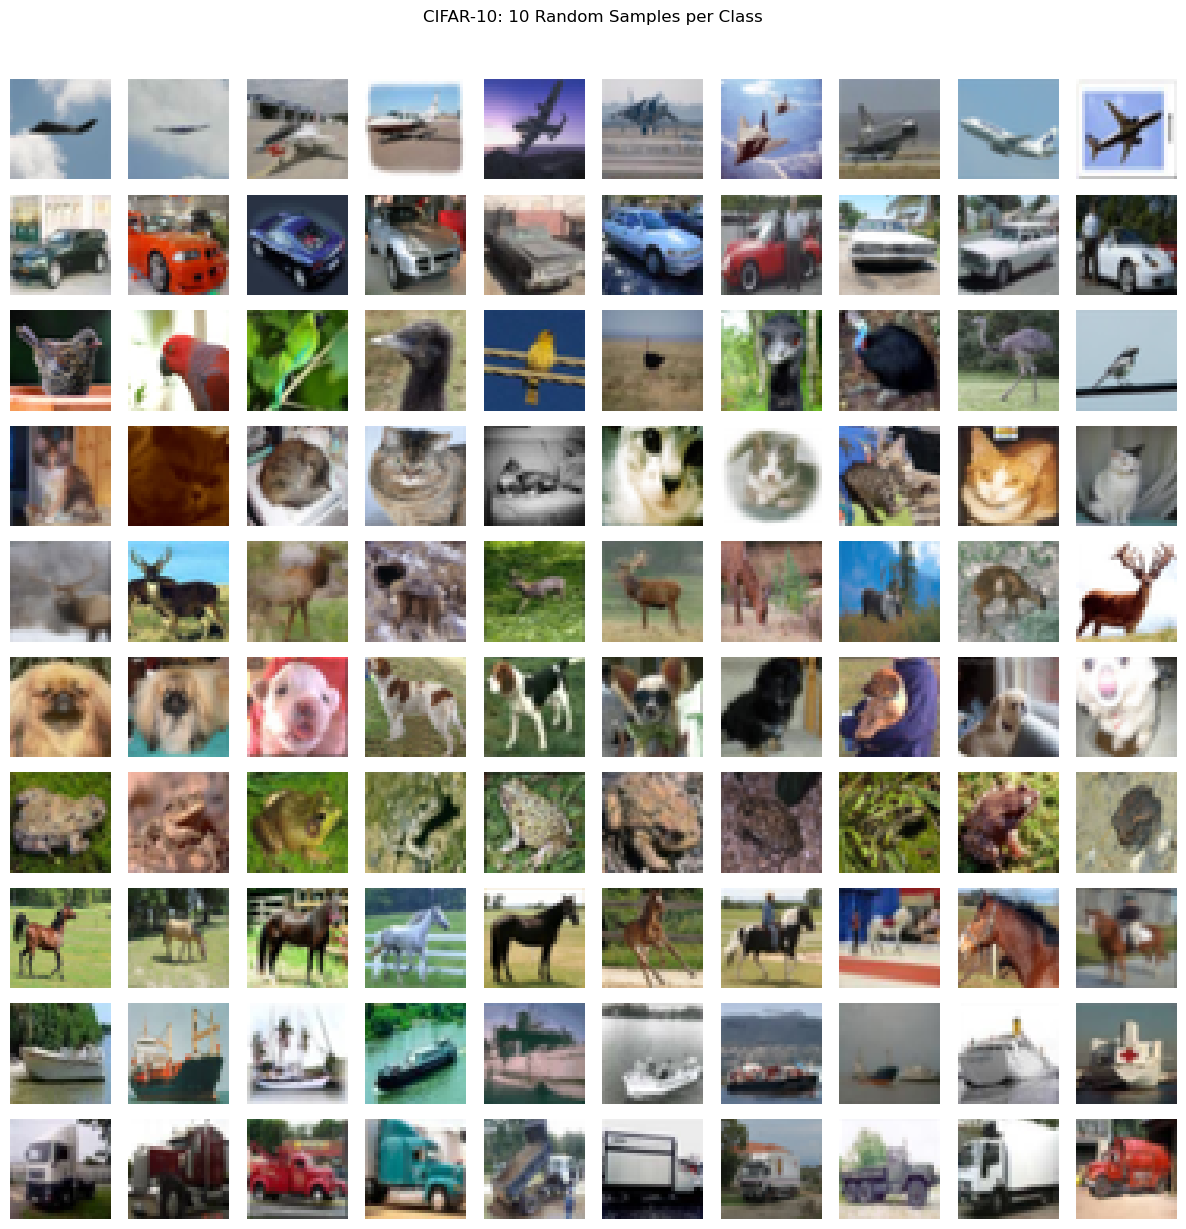

In [24]:
# Visualize: 10 random samples per class
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
for class_idx in range(10):
    # Find indices for this class
    idxs = np.where(y_train.flatten() == class_idx)[0]
    # Select 10 random samples
    selected = np.random.choice(idxs, 10, replace=False)
    for j, idx in enumerate(selected):
        ax = axes[class_idx, j]
        ax.imshow(x_train[idx])
        ax.axis('off')
fig.suptitle('CIFAR-10: 10 Random Samples per Class', y=1.02)
plt.tight_layout()
plt.show()

In [20]:
# Print shapes to confirm
print('x_train shape:', x_train.shape)
print('the y_train one-hot shape is =', y_train_cat.shape)
print('the x_test shape:', x_test.shape)
print('the y_test one-hot shape is =', y_test_cat.shape)

x_train shape: (50000, 32, 32, 3)
the y_train one-hot shape is = (50000, 10)
the x_test shape: (10000, 32, 32, 3)
the y_test one-hot shape is = (10000, 10)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [35]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    # Convolutional front-end
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten to feed into classifier
    Flatten(),

    # Dense layer with 100 units
    Dense(100, activation='relu'),

    # classification layer with softmax)
    Dense(10, activation='softmax')  # Assuming 10 classes
])

# Print model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')  
])

# Printing model summary
model.summary()

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels attempt
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)

# Training the model
history_sm =model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test)
)



c:\Users\Sadiq\OneDrive\Documents\anaconda3\envs\iron_hack_2\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.1579 - loss: 2.2792 - val_accuracy: 0.2359 - val_loss: 2.2005
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.2527 - loss: 2.1630 - val_accuracy: 0.2895 - val_loss: 2.0704
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.2972 - loss: 2.0415 - val_accuracy: 0.3096 - val_loss: 1.9767
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.3179 - loss: 1.9622 - val_accuracy: 0.3321 - val_loss: 1.9239
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.3369 - loss: 1.9114 - val_accuracy: 0.3320 - val_loss: 1.8873
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.3473 - loss: 1.8795 - val_accuracy: 0.3520 - val_loss: 1.8564
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.3574 - loss: 1.8497 - val_accuracy: 0.3724 - val_loss: 1.8246
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.3656 - loss: 1.8272 - val_accuracy: 0.3689 - v

KeyboardInterrupt: 

*   Plot the cross entropy loss curve and the accuracy curve

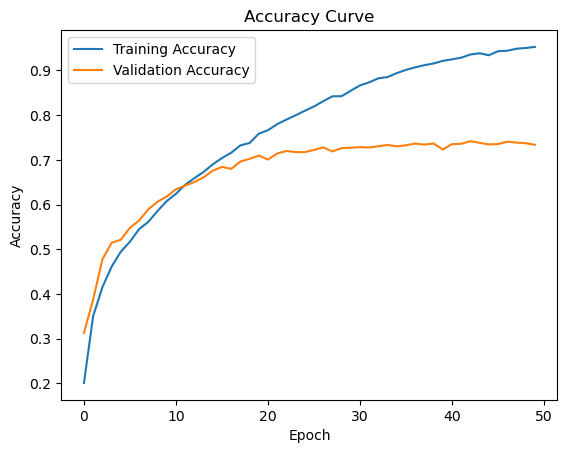

In [ ]:
# Plot Accuracy Curve
plt.plot(history_sm.history['accuracy'], label='Training Accuracy')
plt.plot(history_sm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


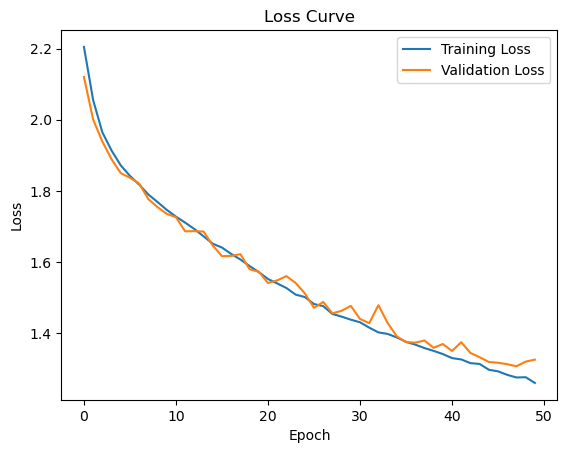

In [ ]:
# Your code here : Plot Loss Curve

plt.plot(history_sm.history['loss'], label='Training Loss')
plt.plot(history_sm.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
# Clearing the existing session
from keras.backend import clear_session
clear_session()

In [69]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Loading and prepare the CIFAR-10 dataset again
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



In [70]:
# Normalizing the image pixel values to be between 0 and 1 as done originallyoriginally
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# One-hot encode the labels (CIFAR-10 has 10 categories)
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)




In [71]:
# Defining VGG CNN model
model = Sequential()

# Two convolution layers + max pooling
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))  # Reduces image size

# Two convolution layers + max pooling
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Flatten + Fully connected layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting
model.add(Dense(10, activation='softmax'))  # 10 output classes


In [72]:
history = model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)


# Finally we Train the model at last
history_vgg = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test)
)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 487ms/step - accuracy: 0.1438 - loss: 2.2495 - val_accuracy: 0.3241 - val_loss: 1.9016
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 508ms/step - accuracy: 0.3265 - loss: 1.8728 - val_accuracy: 0.3778 - val_loss: 1.7675
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 473ms/step - accuracy: 0.4019 - loss: 1.6777 - val_accuracy: 0.4559 - val_loss: 1.5119
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 483ms/step - accuracy: 0.4446 - loss: 1.5358 - val_accuracy: 0.4979 - val_loss: 1.3986
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 525ms/step - accuracy: 0.4839 - loss: 1.4396 - val_accuracy: 0.5243 - val_loss: 1.3240
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 519ms/step - accuracy: 0.5087 - loss: 1.3643 - val_accuracy: 0.5489 - val_loss: 1.2761
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 468ms/step - accuracy: 0.5335 - loss: 1.3061 - val_accuracy: 0.5557 - val_loss: 1.2440
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 468ms/step - accuracy: 0.5515 - loss: 1.2508 - val_accu

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

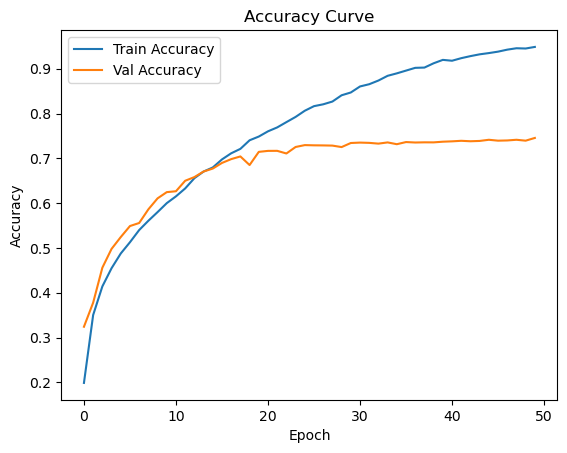

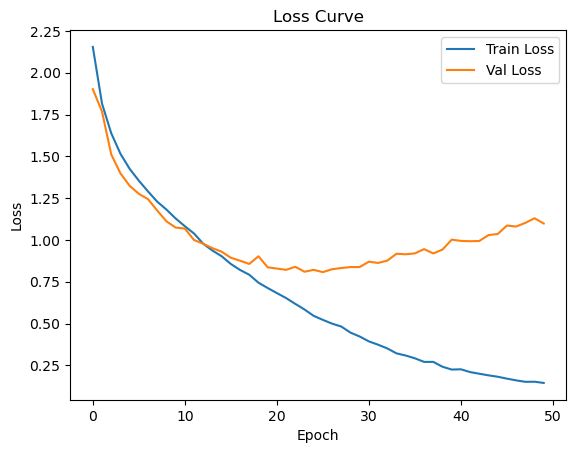

In [75]:
# Ploting the training and validation accuracy
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Ploting of the training and validation loss
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

In [78]:
# Your code here :


import matplotlib.pyplot as plt

simple_history = history_sm_model.fit(...)
vgg_history = vgg_model.fit(...)

# Accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(simple_history.history['accuracy'], label='Simple Train Acc')
plt.plot(simple_history.history['val_accuracy'], label='Simple Val Acc')
plt.plot(vgg_history.history['accuracy'], label='VGG Train Acc')
plt.plot(vgg_history.history['val_accuracy'], label='VGG Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Loss plot
plt.figure(figsize=(10, 5))
plt.plot(simple_history.history['loss'], label='Simple Train Loss')
plt.plot(simple_history.history['val_loss'], label='Simple Val Loss')
plt.plot(vgg_history.history['loss'], label='VGG Train Loss')
plt.plot(vgg_history.history['val_loss'], label='VGG Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



NameError: name 'history_sm_model' is not defined

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


<Figure size 1000x800 with 0 Axes>

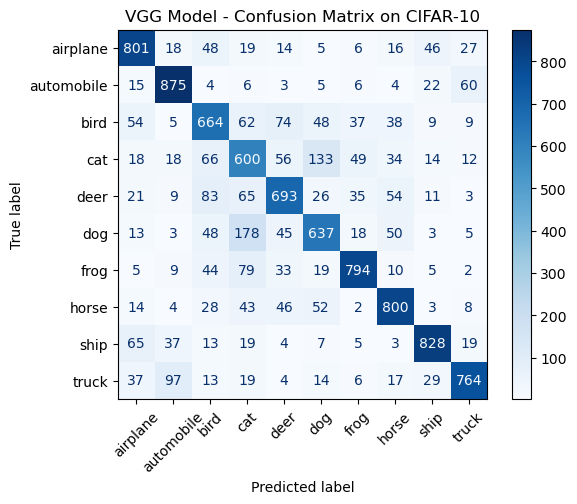

In [77]:
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels (0–9)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded y_test to class labels
y_true = np.argmax(y_test, axis=1)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("VGG Model - Confusion Matrix on CIFAR-10")
plt.show()



**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [14]:
# Your code here :

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [15]:
from keras.backend import clear_session
clear_session()

In [16]:
# Your code here :

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [17]:
# Your code here :

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
